# Mapas Auto-Organizables

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

In [1]:
%matplotlib inline

Los Mapas Auto-Organizables (En inglés: Self-Organizing Maps - SOM), son un tipo de red neuronal que permiten resolver problemas no supervisados. Los SOM están basados un concepto conocido como <i>aprendizaje competitivo</i>; en el cual las neuronas de la capa de salida compiten entre ellas por estar activadas o "despedidas". Sólo una neurona de salida puede estar activada en un determinado tiempo. 

En un SOM las neuronas estan ubicadas en los nodos de una cuadrícula, la cual usualmente tiene una o dos dimensiones. Durante el entrenamiento, las neuronas se van ajustando selectivamente a diferentes patrones de entrada (estímulos), en un proceso de aprendizaje competitivo. La ubicación de las neuronas activadas (winning neurons), van formando un mapa topográfico que se relaciona con los patrones de entrada, en el cual la ubicación espacial de las neuronas en la cuadrícula es un indicador de características estadísticas intrínsecas contenidas en los datos de entrada [1].

![alt text](Images/scheme2.png "Neuronas")

Existen principalmente dos tipos de mapas:
<ul>
<li>Modelo de Willshaw-von der Malsburg</li>
<li>Modelo de Kohonen (figura anterior)</li>
</ul>

El modelo de Kohonen ha sido mucho más ampliamente utilizado ya que el modelo de Willshaw-von der Malsburg está diseñado para modelar problemas en los que el número de entradas es igual al número de salidas. Por otro lado, el modelo de Kohonen captura los elementos esenciales de los mapas corticales, a partir de los cuales se inspiraron este tipo de RNA.

El entrenamiento de la red responsable de la conformación de los mapas tiene tres fases principales (cuatro si consideramos la inicialización de los pesos de la red, para lo cual usamos un generador de números aleatorios):

<ul>
<li><b>Competición</b>: Dada una muestra $\bf{x}$, en esta etapa se debe determinar la neurona ganadora.</li>
<li><b>Cooperación</b>: Teniendo en cuenta la neurona ganadora, se define la vecindad de las neuronas excitadas, lo que permite generar el mapa topográfico.</li>
<li><b>Adaptación sináptica</b>: Es el paso de adaptación, en el que se reajustan los pesos de la red, para favorecer las neuronas actividas</li>
</ul>


## Proceso de Competición

Para mantener la notación utilizada en la gráfica, supongamos que $m$ es la dimensión del espacio de entrada, es decir el número de características. Cada muestra estará entonces representada por un vector ${\bf{x}}=[x_1,x_2,...,x_m]^T$. El vector de pesos sinápticos de cada neurona en la red tiene la misma dimensión del espacio de entrada. Para la neurona $j$, el vector estará dado por ${\bf{w}}=[w_{j1},w_{j2},...,w_{jm}]^T$, para $j=1,2,...,K$.

Para encontrar la neurona que mejor "combina" con un determinado vector de entrada $\bf{x}$, podemos evaluar los productos internos ${\bf{w}}_j^T{\bf{x}}$ y encontrar la neurona $j$ para la cual dicho producto es mayor. El producto es mayor cuando el ángulo entre los vectores es 0, es decir que encontrar la neurona con mayor producto interno ${\bf{w}}_j^T{\bf{x}}$, es matemáticamente equivalente a encontrar la neurona $j$ para la cual la distancia entre los vectores ${\bf{w}}_j$ y ${\bf{x}}$ sea mínima.

La neurona ganadora será entonces aquella que cumpla la condición:

$$i({\bf{x}})=\arg \min_j ||{\bf{x}} - {\bf{w}} _j||, \;\; j \in \mathcal{A}$$

donde $\mathcal{A}$ denota la cuadrícula de neuronas (el conjunto de neuronas).

## Proceso cooperativo

La neurona ganadora estará ubicada en el centro de una <b>vencidad topológica </b> de neuronas cooperantes, intentado emular las vecindades neurobológicas observadas en el cerebro humano. La vecindad topológica estará definida por la cercanía física entre las neuronas de la cuadrícula, definiendo un umbral de vecindad para las neuronas cooperantes. Para emular, biologicamente, de mejor manera el comportamiento de las neuronas en la corteza cerebral, la vecindad no se define de manera rígida, sino que por el contrario se usa una función que permita definir el "nivel de cooperación" de cualquier neurona en relación con la neurona ganadora, a partir de la distancia existente entre ambas.

La vecindad topológica centrada en la neurona ganadora $i$ y cualquier otra neurona exitada $j$, se define como:

$$h_{j,i({\bf{x}})}=\exp\left(-\frac{d_{j,i}^2}{2\sigma^2}\right), \;\; j\in \mathcal{A}$$

El parámetro $\sigma$ se conoce como el ancho efectivo de la vecindad topológica. La distancia $d_{j,i}^2$, corresponde a la distancia en la cuadrícula de las neuronas $i$ y $j$. Si la cuadrícula tiene una sola dimensión, la distancia será igual al entero $|j-i|$; en el caso de una cuadrícula de dos dimensiones, la distancia $d_{j,i}^2 = ||{\bf{r}}_j - {\bf{r}}_i||^2$, donde el vector ${\bf{r}}_j$ está compuesto por las coordenadas de la neurona $j$ en la cuadrícula.

Un aspecto importante de los SOM, es que el tamaño de la vecindad topológica se va reduciendo con el tiempo (iteraciones). La manera usual de implementar dicha reducción, es usar la siguiente expresión:

$$\sigma(t)=\sigma_0\exp\left(-\frac{t}{\tau_1}\right)\;\; t=0,1,2,...$$

donde $\sigma_0$ es el valor de inicialización del tamaño de vecindad y $\tau_1$ es un tiempo definido por el diseñador. Si se usa la expresión anterior, la vecindad topológica estará dada por:

$$h_{j,i({\bf{x}})}(t)=\exp\left(-\frac{d_{j,i}^2}{2\sigma^2(t)}\right), \;\; t=0,1,2,...$$

## Proceso de Adaptación

Esta es la última parte del proceso, en la cual se implementa el "auto-organizamiento" de la red. Para esto, el vector de pesos sináptico ${\bf{w}}_j$ de la neurona $j$, debe cambiar con relación al vector de entrada $\bf{x}$. Como el objetivo es que cada uno de los pesos de las neuronas se muevan en la dirección del vector entrada, siempre y cuando la neurona a actualizar esté en la región de vecindad de la neurona ganadora, la función de actualización en la iteración $t+1$ tiene la forma:

$${\bf{w}}_j(t+1)={\bf{w}}_j(t)+\eta(t)h_{j,i({\bf{x}})}(t)({\bf{x}}(t)-{\bf{w}}_j(t))$$

En este caso la tasa de aprendizaje se asume variable, y está dada por:

$$\eta(t) = \eta_0\exp\left(-\frac{t}{\tau_2}\right) \;\; t=0,1,2,...$$

donde $\tau_2$ es otra constante de tiempo del algoritmo SOM. Valores típicos son $\eta_0 = 0.1$ y $\tau_2 = 1000$.

Veamos un ejemplo

In [ ]:
#Se debe instalar la siguiente libreria
!pip install git+https://github.com/sevamoo/SOMPY.git

In [4]:
#from mvpa2.suite import *
import numpy as np
colors = np.array(
         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.5],
          [0.125, 0.529, 1.0],
          [0.33, 0.4, 0.67],
          [0.6, 0.5, 1.0],
          [0., 1., 0.],
          [1., 0., 0.],
          [0., 1., 1.],
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.],
          [.33, .33, .33],
          [.5, .5, .5],
          [.66, .66, .66]])

# store the names of the colors for visualization later on
color_names = \
        ['black', 'blue', 'darkblue', 'skyblue',
         'greyblue', 'lilac', 'green', 'red',
         'cyan', 'violet', 'yellow', 'white',
         'darkgrey', 'mediumgrey', 'lightgrey']

In [65]:
import sompy

In [112]:
sm = sompy.SOMFactory().build(colors, [20, 30], normalization = 'var', initialization='random', neighborhood = 'gaussian', component_names=['R','G','B'])
sm.train(n_job=4, verbose=False, train_len_factor=0.5, train_rough_len=2, train_finetune_len=100)

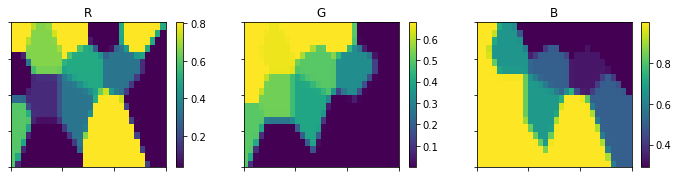

In [113]:
from sompy.visualization.mapview import View2D
view2D  = View2D(50,50,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [114]:
codebook = sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix)
mp = codebook.reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1],codebook.shape[1])
mp.shape

(20, 30, 3)

Definiendo un SOM con una cuadrícula de 20x40 neuronas de salida y 400 iteraciones.

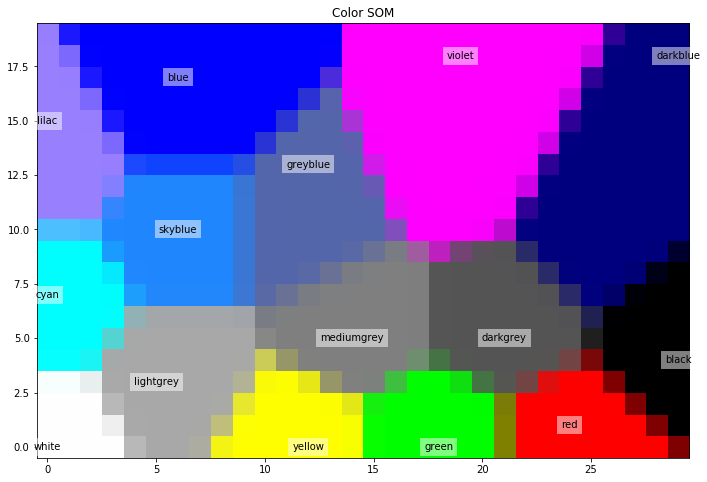

In [115]:
import matplotlib.pyplot as plt
#som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)
#som.train(colors)
Neurons = np.arange(sm.codebook.matrix.shape[0]).reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1])
plt.figure(figsize=(15,8))
plt.imshow(mp, origin='lower')
mapped = sm.project_data(colors)

plt.title('Color SOM')
# SOM's kshape is (rows x columns), while matplotlib wants (X x Y)
for i,j in enumerate(mapped):
    m = np.asarray(np.where(Neurons == j)).flatten()
    plt.text(m[1], m[0], color_names[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))


## Veamos un ejemplo donde un algoritmo de clustering convencional tendría problemas y el SOM no

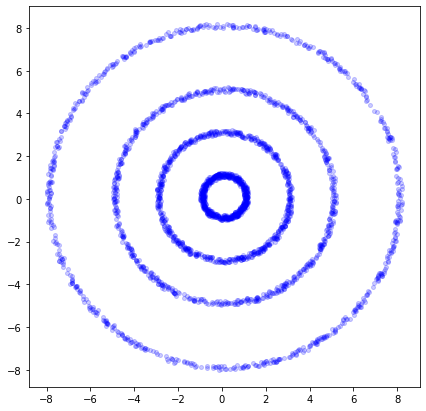

In [116]:
import matplotlib.pyplot as plt
dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)
X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)
X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)
X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)
Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)
fig = plt.figure()
fig.set_size_inches(7,7)
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)

In [118]:
Data2.shape

(2800, 2)

In [139]:
mapsize = [50,50]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose=False, train_finetune_len=200)  # verbose='debug' will print more, and verbose=None wont print anything

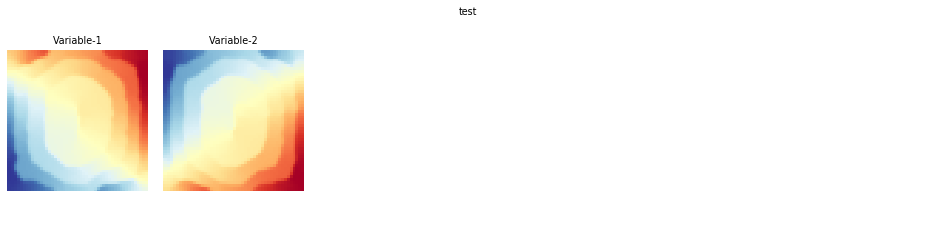

In [140]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

/usr/local/lib/python3.7/dist-packages/SOMPY-1.1-py3.7.egg/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


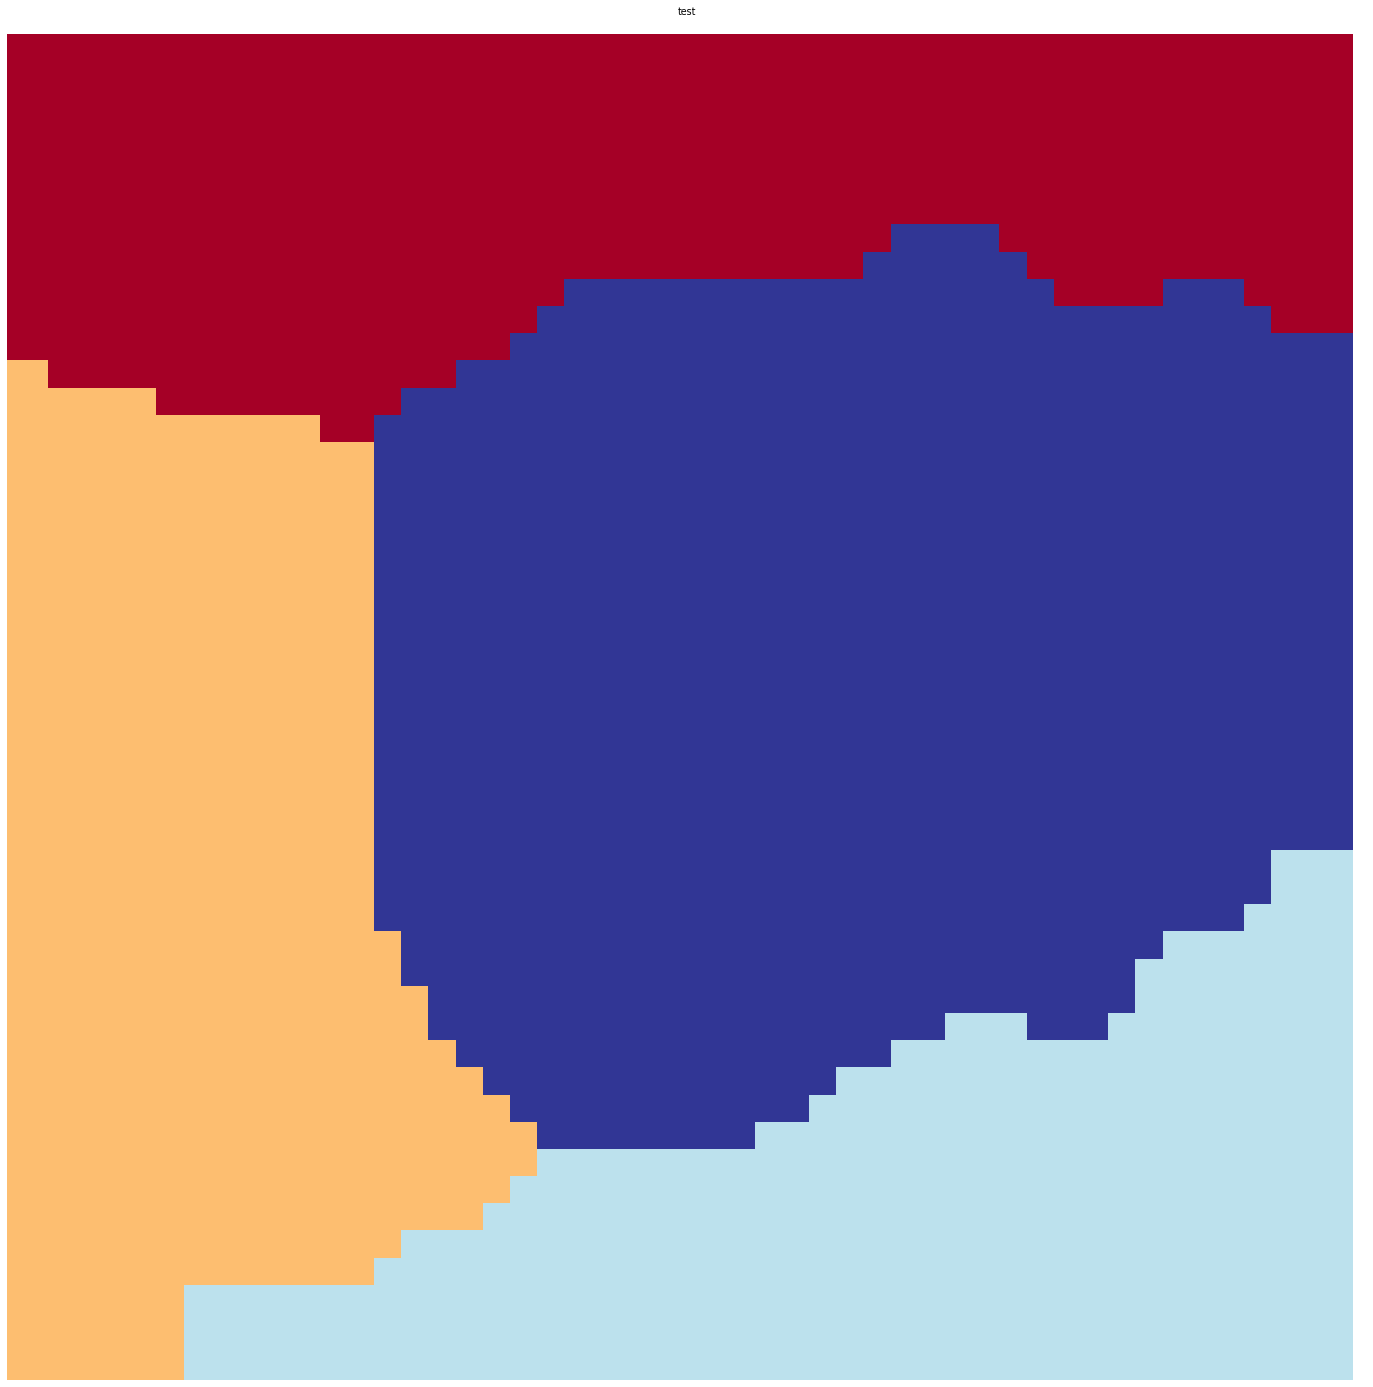

In [141]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
# v.save('kmeans_test')

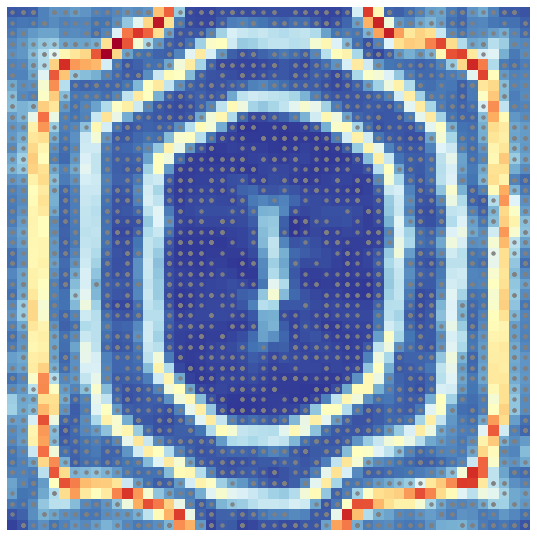

In [142]:
#But Umatrix finds the clusters easily
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)

[1] Simon Haykin, Neural Networks and Learning Machines, 3ra Edición, Prentice Hall, USA, 2009.